<a href="https://colab.research.google.com/github/pedrohgarbim/am-fatec2025-turma2/blob/main/Atividade12_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas

In [ ]:
!pip install plotly --upgrade
!pip install squarify --upgrade

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Carregamento do Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_credit = pd.read_csv('/content/drive/MyDrive/am5/credit_data.csv')
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


## 1. Entenda a Estrutura dos Dados

A. Visualize as primeiras linhas da base de dados e verifique os tipos de variáveis.



In [ ]:
base_credit.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


B. Identifique valores ausentes ou inconsistentes.

In [ ]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

2. ## Análise Estatística Geral

A. Calcule médias, medianas, desvios padrão e distribuições das principais variáveis numéricas.

In [ ]:

base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


Identifique a presença de outliers e distribuições assimétricas.

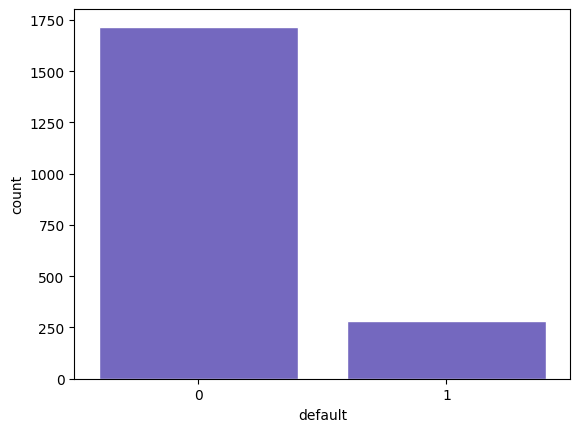

In [ ]:
sns.countplot(x = base_credit['default'], edgecolor='white', color='#6A5ACD');

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

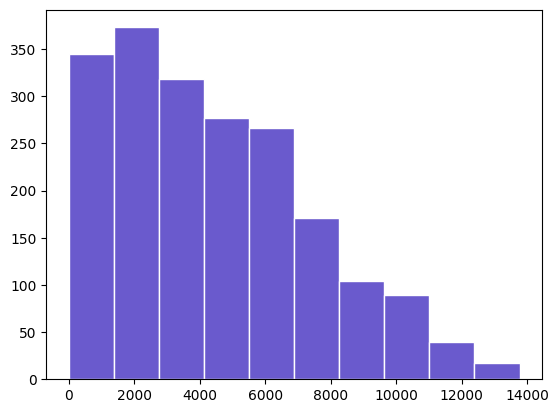

In [ ]:
plt.hist(x=base_credit['loan'], edgecolor='white', color='#6A5ACD')


(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

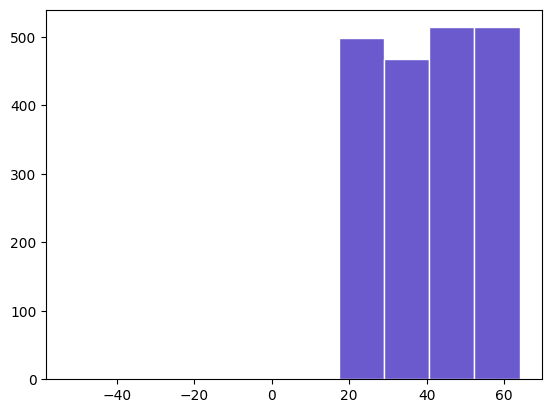

In [ ]:
plt.hist(x=base_credit['age'], edgecolor='white', color='#6A5ACD')


(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

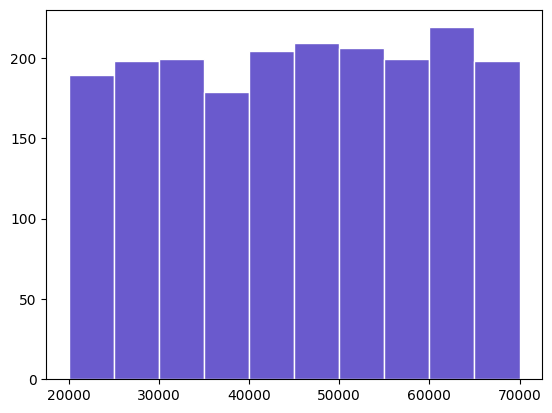

In [ ]:
plt.hist(x=base_credit['income'], edgecolor='white', color='#6A5ACD')


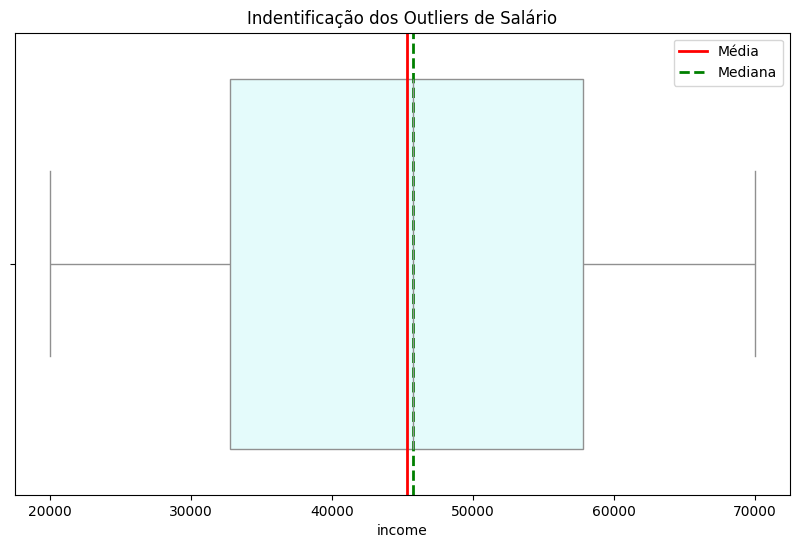

Média da Renda: 45331.60
Mediana da Renda: 45331.60
Desvio Padrão da Renda: 14326.33


In [ ]:
media_income = base_credit['income'].mean()
mediana_income = base_credit['income'].median()
desvio_padrao_income = base_credit['income'].std()

plt.figure(figsize=(10,6))
sns.boxplot(x = base_credit['income'], color = '#E0FFFF')

plt.axvline(media_income, color = 'red', linewidth = 2, label = 'Média')
plt.axvline(mediana_income, color = 'green', linestyle = 'dashed', linewidth = 2, label = 'Mediana')

plt.title('Indentificação dos Outliers de Salário')
plt.legend()
plt.show()

print(f"Média da Renda: {media_income:.2f}")
print(f"Mediana da Renda: {media_income:.2f}")
print(f"Desvio Padrão da Renda: {desvio_padrao_income:.2f}")

In [ ]:
base_credit_anomalic_age = base_credit
base_credit_anomalic_age

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:

base_credit_anomalic_age = base_credit_anomalic_age.drop(base_credit_anomalic_age[base_credit_anomalic_age['age'] < 0].index)
base_credit_anomalic_age

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
structured_age_mean = base_credit_anomalic_age['age'].mean()
structured_age_mean

40.92770044906149

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = structured_age_mean
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit['age'].mean()

40.92770044906149

In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)
base_credit


<ipython-input-70-5b70d6b88374>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,0
loan,0
default,0


In [ ]:

base_credit['age'].mean()

40.92770044906149

## 3. Correlação Entre Variáveis

A. Utilize um mapa de calor (heatmap) para visualizar as correlações entre os atributos.

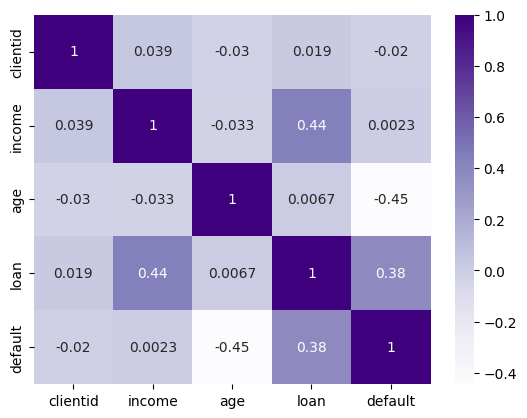

In [ ]:
sns.heatmap(base_credit.corr(), cmap = 'Purples', annot = True);

B. Identifique quais variáveis têm maior impacto no risco de crédito

As duas variáveis que podem mais impactar no risco de crédito são idade, pois quanto maior a idade, menor será o risco de inadimplência e loan, quanto maior o empréstimo , maior vai ser o risco de inadimplência

## 4. Distribuição de Clientes Aprovados e Negados

A. Crie gráficos de barras para visualizar a proporção de clientes aprovados e negados

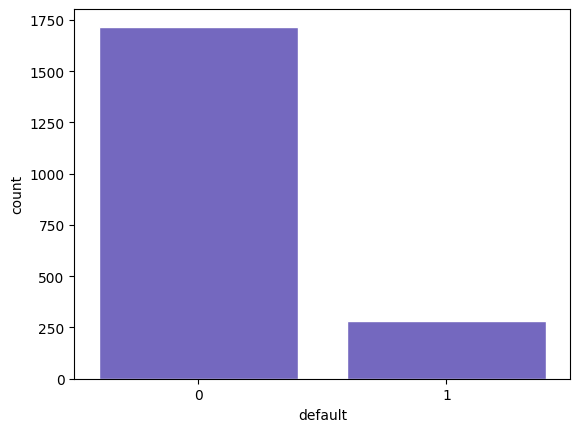

In [ ]:
sns.countplot(x = base_credit['default'], edgecolor='white', color='6A5ACD');


B. Avalie quais fatores mais influenciam a decisão final.

In [ ]:
graphic = px.scatter_matrix(base_credit, dimensions=['income', 'loan'], color = 'default')
graphic.show()

In [ ]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'loan'], color = 'default')
graphic.show()

In [ ]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'income'], color = 'default')
graphic.show()

## 5. Relação entre Idade e Aprovação de Crédito

A. Analise se existe uma faixa etária com maior dificuldade para obter crédito. Utilize boxplots para visualizar essa relação.


<Axes: xlabel='age'>

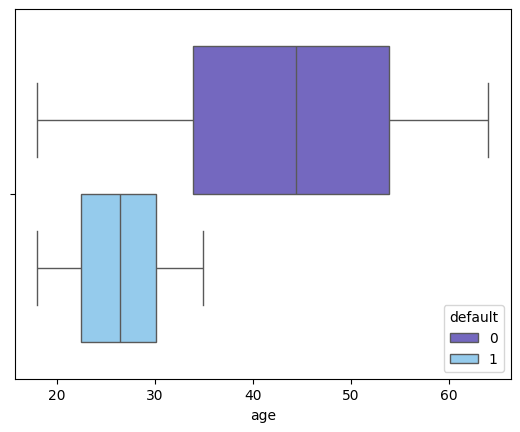

In [ ]:
sns.boxplot(data=base_credit, x='age', hue='default', palette=['#6A5ACD', '#87CEFA'])


## 6. Impacto da Renda no Score de Crédito. Utilize scatter plots para representar a tendência.

In [ ]:
def calculo_score(income, age, loan, default):
    proporcao_emprestimo = loan / income
    score = (1000
              - (10000 * proporcao_emprestimo**1.5)
              + (age * 1)
              - (200 * default))
    return max(min(score, 1000), 0)

In [ ]:
base_credit['score'] = base_credit.apply(lambda row: calculo_score(row['income'], row['age'], row['loan'], row['default']), axis=1)


In [ ]:
base_credit.head(30)


,clientid,income,age,loan,default,score
0,1,66155.925095,59.017015,8106.532131,0,630.074057
1,2,34415.153966,48.117153,6564.745018,0,215.007401
2,3,57317.170063,63.108049,8020.953296,0,539.613853
3,4,42709.534201,45.751972,6103.642260,0,505.500008
4,5,66952.688845,18.584336,8770.099235,1,344.500960
5,6,24904.064140,57.471607,15.498598,0,1000.000000
6,7,48430.359613,26.809132,5722.581981,0,620.635718
7,8,24500.141984,32.897548,2971.003310,1,410.616295
8,9,40654.892537,55.496853,4755.825280,0,655.395877
9,10,25075.872771,39.776378,1409.230371,0,906.550404


In [ ]:
base_credit.describe()

,clientid,income,age,loan,default,score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927700,4444.369695,0.141500,659.728332
std,577.494589,14326.327119,13.251870,3045.410024,0.348624,300.729647
min,1.000000,20014.489470,18.055189,1.377630,0.000000,0.000000
25%,500.750000,32796.459717,29.102161,1939.708847,0.000000,401.656889
50%,1000.500000,45789.117313,41.300710,3974.719419,0.000000,728.461228
75%,1500.250000,57791.281668,52.582340,6432.410625,0.000000,935.796029
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000,1000.000000


In [ ]:
graphic = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
graphic.show()

<Axes: xlabel='income', ylabel='score'>

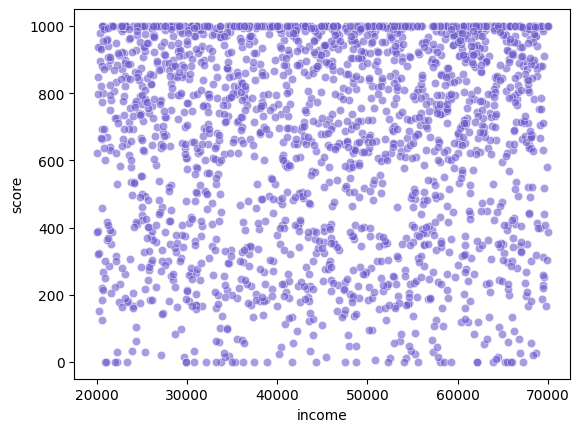

In [ ]:
sns.scatterplot(x='income', y='score', data=base_credit, color='#6A5ACD', alpha=0.6)


## 8.Tempo de Histórico de Crédito e Aprovação


Existe um número mínimo de anos de histórico de crédito para aprovação? Analise essa relação usando gráficos de dispersão.

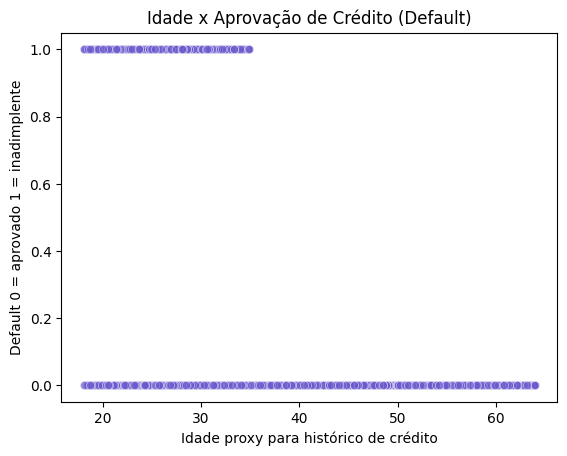

In [ ]:
sns.scatterplot(x='age', y='default', data=base_credit, color='#6A5ACD', alpha=0.6)

plt.title('Idade x Aprovação de Crédito (Default)')
plt.xlabel('Idade proxy para histórico de crédito')
plt.ylabel('Default 0 = aprovado 1 = inadimplente')
plt.show()


Diante desse grafico é viavel dizer que existe grande distribuição entre aprovados e inadimplentes. Sendo aprovados estando em 20 a 60, enquanto os inadimplentes estão localizados em 20 a 35

Com isso, é possivel dizer que, não existe idade certa para aprovação, pois existem aprovados em todas as idades do grafico, inadimplentes por sua vez estando localizados em uma idade considerada mais jovem, isso pode significar que essa faixa de idade tem menos crédito  devido a uma maior dificuldade em pagar

Text(0.5, 1.0, 'Idade x Default')

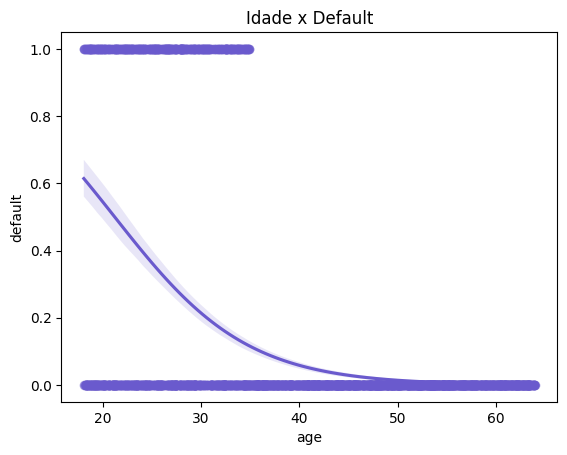

In [ ]:
sns.regplot(x='age', y='default', data=base_credit, logistic=True, color='#6A5ACD', scatter_kws={'alpha':0.5})

plt.title('Idade x Default')



In [ ]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
base_credit['age_group'] = pd.cut(base_credit['age'], bins=bins, labels=labels, right=False)

In [ ]:
default_rates = base_credit.groupby('age_group')['default'].mean()


<ipython-input-99-7ee9ac940c73>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



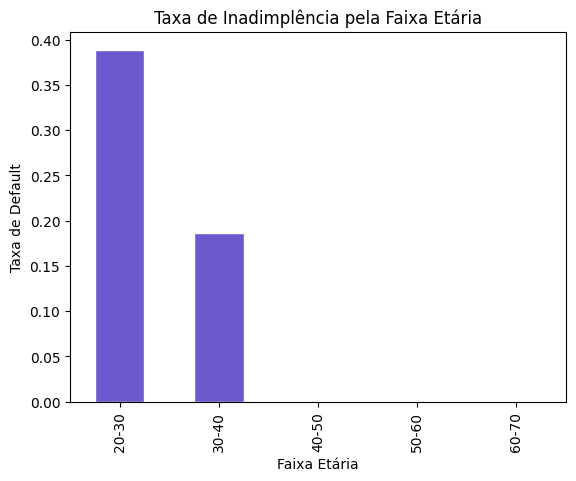

In [ ]:
default_rates.plot(kind='bar', edgecolor='white', color='#6A5ACD')
plt.title('Taxa de Inadimplência pela Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Default')
plt.show()

## 9.Endividamento e Score de Crédito


Pessoas com maior endividamento têm pontuações de crédito mais baixas? Utilize gráficos de dispersão e histogramas para validar essa hipótese.



In [ ]:
base_credit['debt_ratio'] = base_credit['loan'] / base_credit['income']


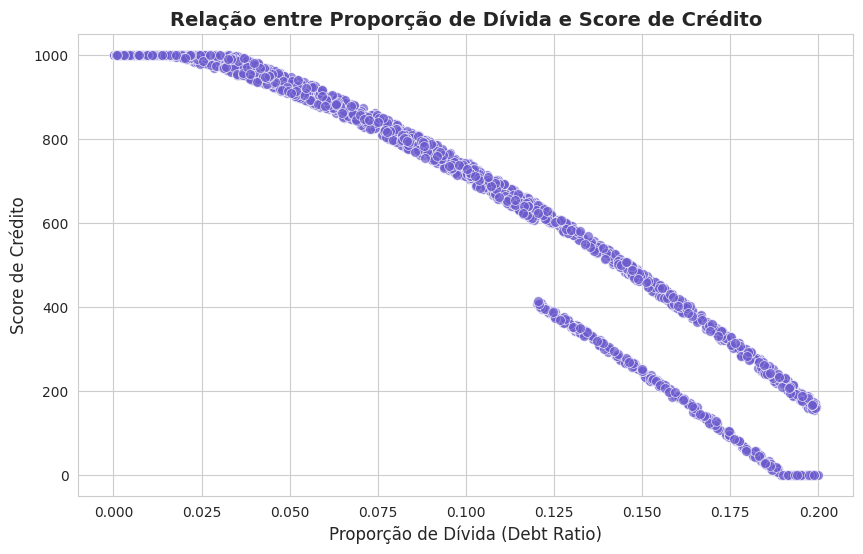

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='debt_ratio', y='score',  data=base_credit, color='#6A5ACD',alpha=0.7, s=50)
plt.xlabel("Proporção de Dívida (Debt Ratio)", fontsize=12)
plt.ylabel("Score de Crédito", fontsize=12)
plt.title("Relação entre Proporção de Dívida e Score de Crédito", fontsize=14, fontweight='bold')
plt.show()



In [ ]:
base_credit['debt_bins'] = pd.qcut(base_credit['debt_ratio'], q=4, labels=['Baixo', 'Moderado', 'Alto', 'Muito Alto'])


<Axes: xlabel='score', ylabel='Count'>

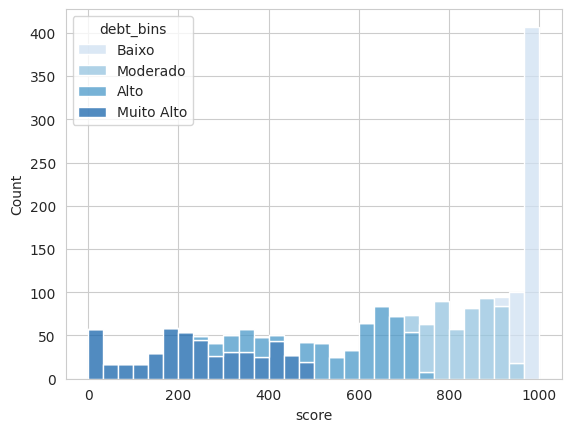

In [ ]:
sns.histplot(data=base_credit, x='score', hue='debt_bins', multiple='stack', bins=30, palette='Blues')


## 10.Conclusões e Recomendações para Modelagem


Com base nos insights obtidos, quais variáveis parecem mais relevantes para um modelo de aprendizado de máquina?


Renda, devido a ter uma relação entre renda mais baixa e pontuações de score mais baixas

Emprestimo, proporção entre ele e renda é um fator importante no aprendizado da maquina, maiores emprestimos levam a uma renda resultante em scores mais baixos

Idade, clientes mais jovens tendem a ter mais inadimplencia, algo interessante para o aprendizado da maquina

Há necessidade de engenharia de features ou tratamento de dados para melhorar a qualidade do modelo

as variaveis que podem ser mudadas são loan e income, faixa etaria e um score ajustado para condizer melhor com as interações entre idades  

Engenharia de Features;

agrupar idades para melhor visualizar o historico do individuo, razao e emprestimo, para ciar uma variavel que pode indicar endividamento relativo ao salario